In [1]:
import pickle
import pandas as pd
import numpy as np
import re
import itertools
import json

from konlpy.tag import Mecab
mecab = Mecab()

from pykospacing import Spacing

spacing = Spacing()

In [44]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/TotalCompanyInfo.json', 'rb') as f:
    CompanyInfoss = json.load(f)

In [70]:
stopwords = set()
addWords = set()

f = open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/stopwords_final.txt')
while True:
    line = f.readline()
    if not line:break
    stopwords.add(line[:-1])
f.close()

f = open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/addwords_final.txt')
while True:
    line = f.readline()
    if not line:break
    addWords.add(line[:-1])
f.close()

In [71]:
len(stopwords)

1778

In [5]:
len(addWords)

1811

In [6]:
with open("/home/ai-sjjy/Downloads/mecab-ko-dic-2.1.1-20180720/user-dic/nnp.csv", 'r', encoding='utf-8') as f:
    file_data = f.readlines()

In [7]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 'sk케미칼,,,,NNP,*,T,sk케미칼,*,*,*,*,*\n',
 '기성내역서,,,,NNP,*,F,기성내역서,*,*,*,*,*\n',
 '한국알프스,,,,NNP,*,F,한국알프스,*,*,*,*,*\n',
 '냉장고를부탁해,,,,NNP,*,T,냉장고를부탁해,*,*,*,*,*\n',
 '킨코스코리아,,,,NNP,*,F,킨코스코리아,*,*,*,*,*\n',
 '포스코강판,,,,NNP,*,T,포스코강판,*,*,*,*,*\n',
 '한국단자공업,,,,NNP,*,T,한국단자공업,*,*,*,*,*\n',
 '컴퓨터활용,,,,NNP,*,T,컴퓨터활용,*,*,*,*,*\n',
 '아시아나에어포트,,,,NNP,*,F,아시아나에어포트,*,*,*,*,*\n',
 '제로투세븐,,,,NNP,*,T,제로투세븐,*,*,*,*,*\n',
 '대교,,,,NNP,*,F,대교,*,*,*,*,*\n',
 '엔테크서비스,,,,NNP,*,F,엔테크서비스,*,*,*,*,*\n',
 '메카트로닉스,,,,NNP,*,F,메카트로닉스,*,*,*,*,*\n',
 '한국동서발전,,,,NNP,*,T,한국동서발전,*,*,*,*,*\n',
 '애로사항,,,,NNP,*,T,애로사항,*,*,*,*,*\n',
 '기교,,,,NNP,*,F,기교,*,*,*,*,*\n',
 '미쓰비시,,,,NNP,*,F,미쓰비시,*,*,*,*,*\n',
 '한국에스지에스,,,,NNP,*,F,한국에스지에스,*,*,*,*,*\n',
 '임하,,,,NNP,*,F,임하,*,*,*,*,*\n',
 '국순당,,,,NNP,*,T,국순당,*,*,*,*,*\n',
 '아트박스,,,,NNP,*,F,아트박스,*,*,*,*,*\n',
 '근성,,,,NNP,*,T,근성,*,*,*,*,*\n',
 '역이용,,,,NNP,*,T,역이용,*,*,*,*,*\n',
 '무료,,,,NNP,*,F,무료,*,*,*,*,*\n',
 '한솔로지스틱스,,,,NNP,*

In [8]:
from jamo import h2j, j2hcj 

def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text)
    last_word = sample_text_list[-1]
    last_word_jamo_list = list(j2hcj(h2j(last_word)))
    last_jamo = last_word_jamo_list[-1]
    jongsung_TF = "T" 

    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']: jongsung_TF = "F" 

    return jongsung_TF


In [9]:
for word in addWords: 
    if word == "": continue
    jongsung_TF = get_jongsung_TF(word) 

    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)

    file_data.append(line)

In [10]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 'sk케미칼,,,,NNP,*,T,sk케미칼,*,*,*,*,*\n',
 '기성내역서,,,,NNP,*,F,기성내역서,*,*,*,*,*\n',
 '한국알프스,,,,NNP,*,F,한국알프스,*,*,*,*,*\n',
 '냉장고를부탁해,,,,NNP,*,T,냉장고를부탁해,*,*,*,*,*\n',
 '킨코스코리아,,,,NNP,*,F,킨코스코리아,*,*,*,*,*\n',
 '포스코강판,,,,NNP,*,T,포스코강판,*,*,*,*,*\n',
 '한국단자공업,,,,NNP,*,T,한국단자공업,*,*,*,*,*\n',
 '컴퓨터활용,,,,NNP,*,T,컴퓨터활용,*,*,*,*,*\n',
 '아시아나에어포트,,,,NNP,*,F,아시아나에어포트,*,*,*,*,*\n',
 '제로투세븐,,,,NNP,*,T,제로투세븐,*,*,*,*,*\n',
 '대교,,,,NNP,*,F,대교,*,*,*,*,*\n',
 '엔테크서비스,,,,NNP,*,F,엔테크서비스,*,*,*,*,*\n',
 '메카트로닉스,,,,NNP,*,F,메카트로닉스,*,*,*,*,*\n',
 '한국동서발전,,,,NNP,*,T,한국동서발전,*,*,*,*,*\n',
 '애로사항,,,,NNP,*,T,애로사항,*,*,*,*,*\n',
 '기교,,,,NNP,*,F,기교,*,*,*,*,*\n',
 '미쓰비시,,,,NNP,*,F,미쓰비시,*,*,*,*,*\n',
 '한국에스지에스,,,,NNP,*,F,한국에스지에스,*,*,*,*,*\n',
 '임하,,,,NNP,*,F,임하,*,*,*,*,*\n',
 '국순당,,,,NNP,*,T,국순당,*,*,*,*,*\n',
 '아트박스,,,,NNP,*,F,아트박스,*,*,*,*,*\n',
 '근성,,,,NNP,*,T,근성,*,*,*,*,*\n',
 '역이용,,,,NNP,*,T,역이용,*,*,*,*,*\n',
 '무료,,,,NNP,*,F,무료,*,*,*,*,*\n',
 '한솔로지스틱스,,,,NNP,*

## 전처리 시작

In [4]:
from pykospacing import Spacing

spacing = Spacing()

In [5]:
from konlpy.tag import Mecab
mecab = Mecab()

In [13]:
def clean_content(sentences, stopwords):
    sentences_words = []

    for sentence in sentences:
        # 정규 표현식 필터 1 - 기호 제거(한글, 숫자, 영어 => )
        sentence = spacing(sentence) 
        sentence = re.sub('[^a-f가-힣 ]', "", sentence.lower())

        new_words = []
        for word, pos in mecab.pos(sentence):
            if word.isalpha(): 
                sentences_words.append(word)
                continue
            if "NNG" in pos or "NNP" in pos or "VA" in pos:
                if word not in stopwords:
                    sentences_words.append(word.strip())

    return sentences_words

In [6]:
def clean_content2(sentences, stopwords):
    sentences_words = []

    for sentence in sentences:
        # 정규 표현식 필터 1 - 기호 제거(한글, 숫자, 영어 => )
        sentence = spacing(sentence) 
        sentence = re.sub('[^a-f가-힣 ]', "", sentence.lower())

        for word, pos in mecab.pos(sentence):
            if "NNG" in pos or "NNP" in pos or "VA" in pos:
                if word not in stopwords:
                    sentences_words.append(word)

    return " ".join(sentences_words)

In [7]:
def clean_content2(sentences, stopwords):
    sentences_words = []

    for sentence in sentences:
        # 정규 표현식 필터 1 - 기호 제거(한글, 숫자, 영어 => )
        sentence = spacing(sentence) 
        sentence = re.sub('[^a-f가-힣 ]', "", sentence.lower())
        
        temp = []
        for word, pos in mecab.pos(sentence):
            if "NNG" in pos or "NNP" in pos or "VA" in pos:
                if word not in stopwords:
                    temp.append(word)
        sentences_words.append(" ".join(temp))
        

    return " ".join(sentences_words)

In [21]:
new_dataset2 = dict()
for company, value in CompanyInfos.items():
    temp=[]
    for content in value['split']:
        result = clean_content2(content, stopwords)
        temp.append(result)
    new_dataset2[company] = {'preprocess' : temp, '인재상' : value['인재상'], '핵심가치' : value['핵심가치']}

In [8]:
new_dataset2 = dict()
for company, value in CompanyInfos.items():
    temp=[]
    for content in value['split']:
        result = clean_content2(content, stopwords)
        temp.append(result)
    new_dataset2[company] = {'preprocess' : temp, '인재상' : value['인재상'], '핵심가치' : value['핵심가치'], 'origin' : CompanyInfos[company]['split']}

In [9]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/FinalCompanyInfo4.json', 'w') as f:
    json.dump(new_dataset2, f)

In [22]:
len(new_dataset2)

905

In [23]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/FianlCompanyInfo2.json', 'w') as f:
    json.dump(new_dataset2, f)

In [50]:
for key in new_dataset2.keys():
    temp = []
    for content in CompanyInfos[key]['split']:
        temp.append(" ".join(content))
    new_dataset2[key]['origin'] = temp

## EDA

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=10)

In [25]:
sentence_nums = dict()
word_nums = dict()

word = set()
for key, value in new_dataset2.items():
    sentence_nums[key] = len(value['preprocess'])
    for words in value['preprocess']:
        word_nums[key] = (len(words))
        for w in words:
            word.add(w)

NameError: name 'new_dataset' is not defined

In [42]:
sentence_nums['br코리아']

10

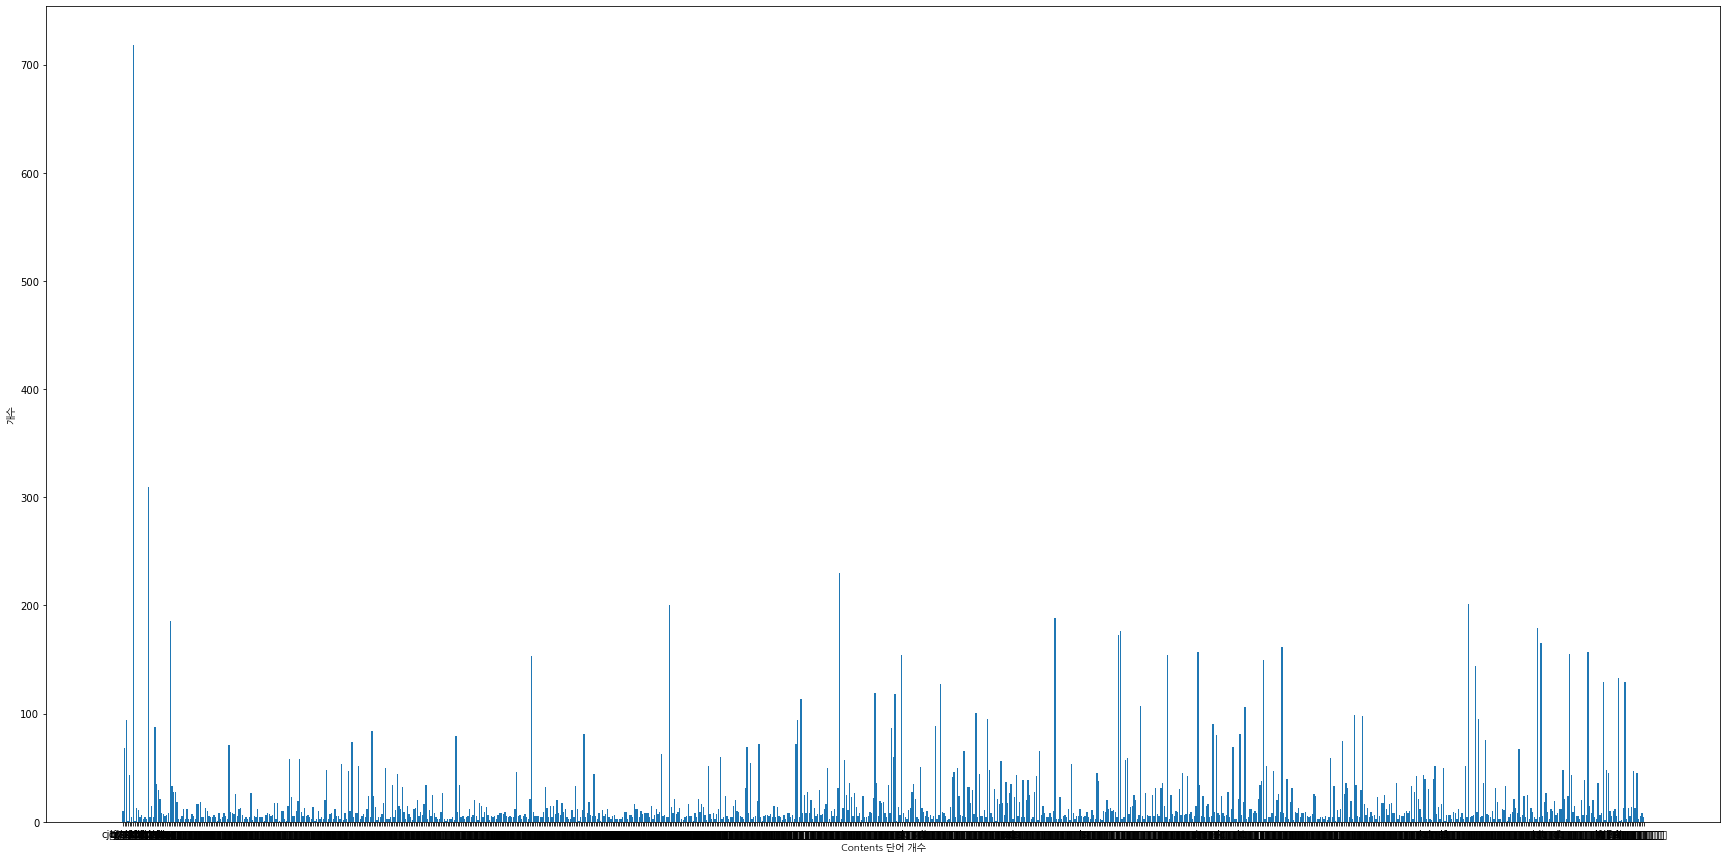

In [48]:
plt.figure(figsize=(30, 15))
plt.bar(sentence_nums.keys(), sentence_nums.values())
plt.xlabel("Contents 단어 개수", fontproperties=fontprop)
plt.ylabel("개수", fontproperties=fontprop)
plt.show()

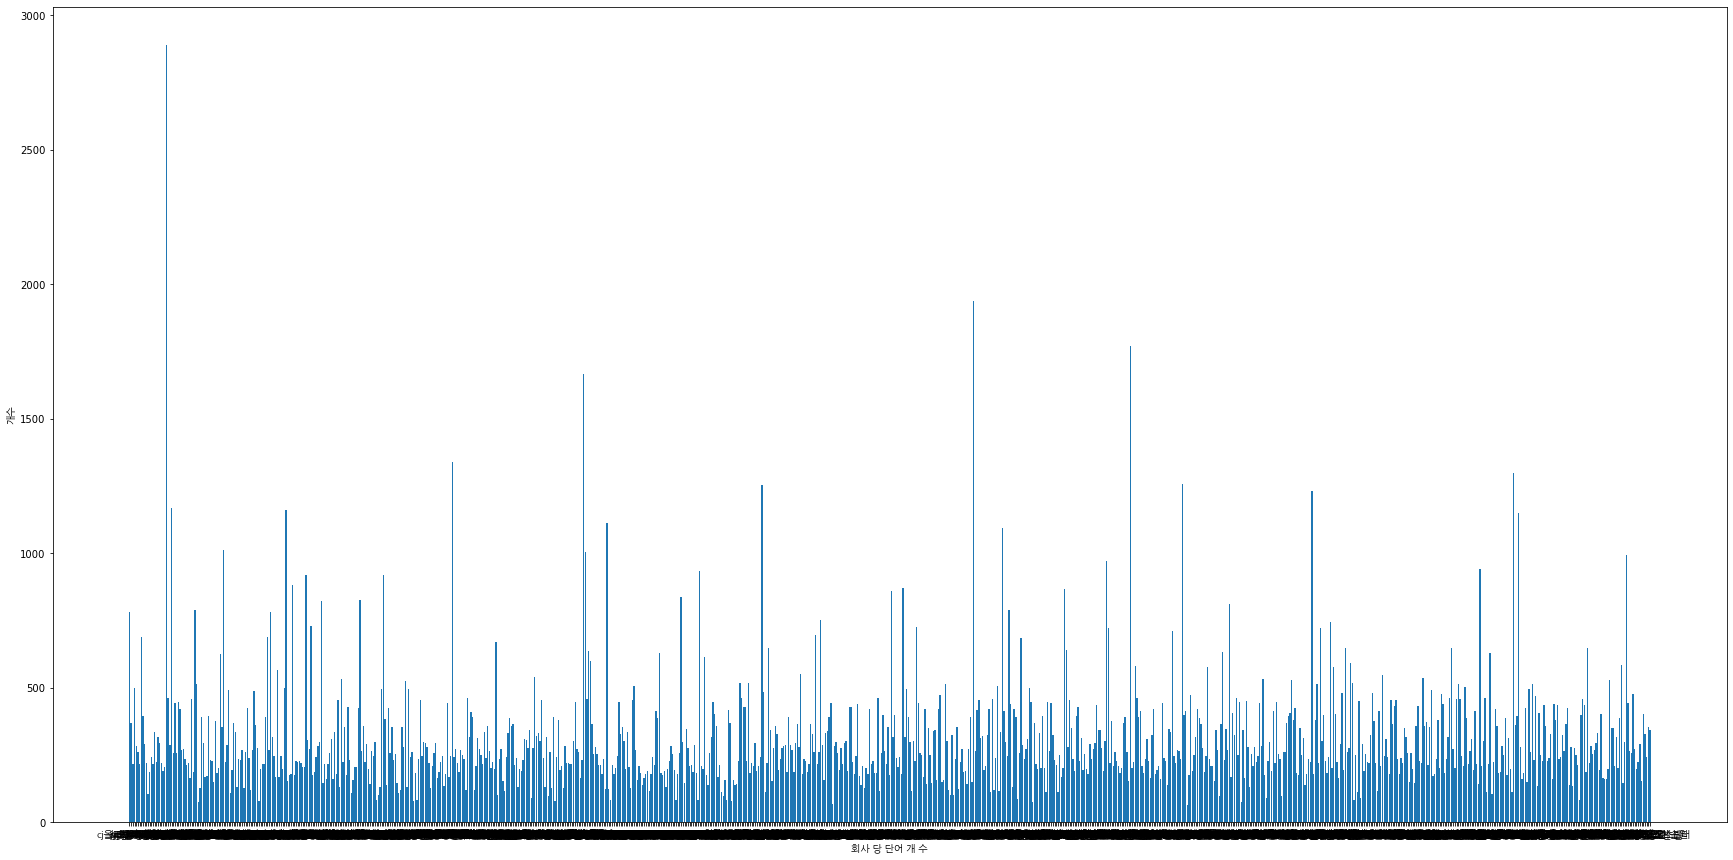

In [47]:
plt.figure(figsize=(30, 15))
plt.bar(word_nums.keys(), word_nums.values())
plt.xticks(fontproperties=fontprop)
plt.xlabel("회사 당 단어 개수", fontproperties=fontprop)
plt.ylabel("개수", fontproperties=fontprop)
plt.show()

In [51]:
# 평균 문장 개수
print("Average # of words: {}".format(sum(sentence_nums.values())/len(sentence_nums)))
print("Max # of words: {}".format(max(sentence_nums.values())))
print("")

Average # of words: 19.58342541436464
Max # of words: 718


In [53]:
# 평균 단어 개수
print("Average # of words: {}".format(sum(word_nums.values())/len(word_nums)))
print("Max # of words: {}".format(max(word_nums.values())))

Average # of words: 313.14585635359117
Max # of words: 2888


In [56]:
len(word)

31420

## 회사별 키워드 추출 및 저장

In [29]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/FianlCompanyInfo2.json', 'r') as f:
    new_dataset = json.load(f)

In [30]:
for key, value in new_dataset.items():
    print(f"company = {key}")
    
    print("result #")
    result1 = value['preprocess']
    print(result1)
    input()
    clear_output(wait=False)

company = br코리아
result #
['경쟁 한국 식품 산업 지속 마케팅 콘셉트 변화 시도 이익 비알 본격 추억 비알 매장이 품질 서비스 경험 선사 자리매김 고객 입장 유통 채널 증가 제품 비알 매장 이유 비알 브랜드 가치 생각 건강 활기찬 인사 대변 비알 제품 서비스 고객 접점 영업장 비알 이미지 제품 서비스 관리 고객 경청 불편 신속 집중 현장 근무 고객 불만 건수 노력 상황 대처 상황 매뉴얼 공부 발전 관리 인재 비알 특색 매장 기획 관리 사회 즐거움 비전', '그룹 핵심 가치 협업 동아리 회장 행사 기획 개최 경험 부담감 생각 회원 열정 참여 역사 동아리 생각 회원 부담 회원 동기 부여 자세 전략 인간 노력 회의 특성 역량 업무 시간 할애 동아리 일상 삶 시간 마음 순위 자발 회원 열정 행사 성공리 비알 사원 지속 변화 성장 목표 달성 사람 생각 다방면 노력 사람 신뢰 에너지 전달 사람 자세 마음 협력 인재', '인턴사원 매장 관리 경험 영업 관리 직무 매력 고객 매장 방문 차이 관리자 관점 현장 시간 직무 능력 담당 시스템 사용법 매장 상품 숙지 발주 관리 유통 스티커 발급 문제 수행 칭찬 경쟁사 방문 매출 차이 보완 점장 분석력 정보 회사 가치 지식 현장 조사 인성 노력 사원 일상 업무 진심 소통 불편 적극 현장 목소리 사무실 영업 기록 회의 시간 소통 능력 매장 관리 능력 사원 불만 해소 자연 업무 성과 체험 시간 시간 매장 관리 시간 비알 관리 매장 책임감 판매 관리 매출', '인턴 근무 내점 고객 특성 니즈 파악 경험 손쉽 쇼핑 변경 상품 성분 정보 정리 매출 목표치 달성 매출 고객 마음 치유 고객 고객 입장 생각 기업 성의 생각 대외 활동 제품 홍보 미션 수행 홍보 방법 트렌드 세대 밀집 지역 마케팅 과정 핵심 고객 입장 생각 고객 만족 인지도 고객 파악 소비자 유통 채널 해결 공부 고객 고객 신속 정확 서비스 연습 고객 니즈 파악 역량 성장 비알 성장 비알 영업 관리자', '고객 가까이 호흡 직무 영업 관리 생각 접점 역량 발휘 매

KeyboardInterrupt: Interrupted by user

* 질뮨이 적은 회사는 과연 어떤 파라미터 값 줘야할까?

In [31]:
min_1 = [] # 1~5
min_2 = [] # 6~30
middle_1 = [] # 30~100
middle_2 = [] # 100~200
max_1 = [] # 200~450
max_2 = [] # 450~700

for key, value in new_dataset2.items():
    len_s = len(value['preprocess'])
    if 1 <= len_s <= 5: min_1.append((key, value['preprocess']))
    elif 6 <= len_s <= 30: min_2.append((key, value['preprocess']))
    elif 31 <= len_s <= 100: middle_1.append((key, value['preprocess']))
    elif 101 <= len_s <= 200: middle_2.append((key, value['preprocess']))
    elif 201 <= len_s <= 450: max_1.append((key, value['preprocess']))
    else: max_2.append((key, value['preprocess']))

In [32]:
print(len(min_1))
print(len(min_2))
print(len(middle_1))
print(len(middle_2))
print(len(max_1))
print(len(max_2))

354
405
116
26
3
1


In [33]:
train_set = [
    # , min_count, max_length, beta, max_iter
    (min_1, 1, 300, 0.85, 20),
    (min_2, 2, 300, 0.85, 20),
    (middle_1, 3, 300, 0.85, 20),
    (middle_2, 3, 300, 0.85, 20),
    (max_1, 3, 300, 0.85, 20),
    (max_2, 3, 300, 0.85, 20)
]

In [34]:
from krwordrank.word import KRWordRank
from krwordrank.sentence import summarize_with_sentences
from krwordrank.word import summarize_with_keywords

In [35]:
Company_info = dict()
extract = dict()

In [37]:
new_dataset['대전도시공사']

{'preprocess': ['분담 협력 시너지 대전 도시 공사 대전 힘 지역 대표 경연 대회 팀원 출전 팀원 역량 제작 적용 계정 제안 콘텐츠 촬영 연출 각본 팀 업무 분담 개인 계정 게재 콘텐츠 팀 팀 대표 계정 팔 워 영상 제작 과정 아이디어 공유 영상 제작 과정 공유 팔 워 영상 피드백',
  '해외 봉사 활동 인종 언어 문화 행복 시민 행복 마음 대전 도시 공사 일원 대전 시민 행복 일상 마음 행복 도시 대전'],
 '인재상': [],
 '핵심가치': []}

In [42]:
train_set[0][0]

[('cj텔레닉스',
  ['재학 생산 팀 취직 계 근무 업무 기계 포장 계정 근무 직원 업무 책임자 근무 경험 퇴사 아르바이트 푸드 빌 운영 제빵 교육 과제 빵 공부 교육 청담 취직 샐러드 과제 빵 제조 업무 신입 사원 제품 제조 교육 오픈 특성 고객 응대 업무 근무 학업 목표 퇴사 개인 학업 단념 보람 고객 만족 노력 끈기 시간 약속 습관 업무 적응 시간 단점 적응 시뮬레이션 연습 노력 웃음 사람 소통 책임 실수 실수 인정 개선 근무 고객 응대 빵 빵 구입 고객 만족 고객 보람 고객 응대 고객 만족 보람 친절 신속 정확 소통 서비스 자랑 텔 레닉스 역량 발휘 회사 인재 목표']),
 ('gs동해전력',
  ['경쟁력 효율 환경 생각 전공 기계 공학 학문 효율 목표 동력 사이클 효율 프로그래밍 설계 기계 작업 효율 자세 생각 효율 돈 시간 사람 협업 업무 사이클 발전소 운영 관리 직무 수행 일관 자세 정비 수행 관리 공장 실수 작동 회사 손실 발전소 시스템 실수 용납 단순 단순 갖가지 변수 생각 긴장감 내심 직무 인식 생각 직무 생각 직무 수행 이해 생각 성향 공학 이해 직무 수행',
   '실패 성공 과정 끈기 성장 강점 콤플렉스 체형 약한 체력 약점 극복 시간 하프마라톤 친구 완주 사진 동아리 연구 부장 사진 준비 필름 현상 인화 액자 완성 과정 관리 문제 동아리 공사 사진 동아리 작업 기기 시간 생각 의견 사진 노력 작업 체력 사진 작업 지도 작업 집중 동기 성공 사진',
   '취미 모형 조립 제작 색 조립 제작 이유 변형 경험 예전 프라 모델 비싼 가격 부담 제품 생각 프린팅 이해 과목 새롭 전공 과목 신청 개인 과제 제품 반기 기사 자격증 준비 연습 동력 전달 장치 지그 척 프린터 변환 동력 전달 장치 부품 공차 자격증 시험 비중 학습 프린터 필러 재질 유도 부품 마찰 제작 오차 작동 취미 개인 이유 수강 신청 경험 이론 전공 적용 이론 현장 관점 생각 차이 이해 경험',
   '사진 개강 사진 동아리 입부 시간 근교 사진 필름 현상 인화 동기 인

In [45]:
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1
for train_batch, min_count, max_length, beta, max_iter in train_set:
    for train in train_batch:

        wordrank_extractor = KRWordRank(
            min_count = min_count, 
            max_length = max_length, # 단어의 최대 길이
            verbose = True
        )
        
        train_pre = []
        for preprocess in train[1]:
            train_pre.append(preprocess)

        keywords1, rank, graph = wordrank_extractor.extract(train_pre, beta, max_iter)
        company = train[0]
        Company_info[company] = {
            'keysents' : keysents,
            'keywords1' : keywords1,
            'keywords2' : keywords2,
            'rank' : rank,
            'graph' : graph,
            'preprocess' : new_dataset[company]['preprocess'],
            '인재상' : new_dataset[company]['인재상'],
            '핵심가치' : new_dataset[company]['핵심가치'],
            'origin' :  CompanyInfoss[company]['split']
        }
        
        
        extract[company] = wordrank_extractor

scan vocabs ... 
num vocabs = 191
done = 20
scan vocabs ... 
num vocabs = 366
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 342
done = 20 Early stopped.
scan vocabs ... 
num vocabs = 435
done = 17 Early stopped.
scan vocabs ... 
num vocabs = 233
done = 17 Early stopped.
scan vocabs ... 
num vocabs = 306
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 262
done = 20
scan vocabs ... 
num vocabs = 308
done = 20
scan vocabs ... 
num vocabs = 430
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 793
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 278
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 280
done = 17 Early stopped.
scan vocabs ... 
num vocabs = 421
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 323
done = 19 Early stopped.
scan vocabs ... 
num vocabs = 583
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 422
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 344
done = 20 Early stopped.
scan vocabs ... 
num vocabs = 349
done = 1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done = 15 Early stopped.
scan vocabs ... 
num vocabs = 415
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 300
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 494
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 434
done = 17 Early stopped.
scan vocabs ... 
num vocabs = 331
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 241
done = 17 Early stopped.
scan vocabs ... 
num vocabs = 854
done = 14 Early stopped.
scan vocabs ... 
num vocabs = 251
done = 19 Early stopped.
scan vocabs ... 
num vocabs = 528
done = 19 Early stopped.
scan vocabs ... 
num vocabs = 213
done = 19 Early stopped.
scan vocabs ... 
num vocabs = 389
done = 19 Early stopped.
scan vocabs ... 
num vocabs = 392
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 487
done = 17 Early stopped.
scan vocabs ... 
num vocabs = 385
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 522
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 370
done = 19 Early stopped.
scan vocabs ... 
num vocabs = 2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



done = 12 Early stopped.
scan vocabs ... 
num vocabs = 360
done = 13 Early stopped.
scan vocabs ... 
num vocabs = 500
done = 11 Early stopped.
scan vocabs ... 
num vocabs = 248
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 261
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 384
done = 13 Early stopped.
scan vocabs ... 
num vocabs = 325
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 307
done = 14 Early stopped.
scan vocabs ... 
num vocabs = 289
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 202
done = 15 Early stopped.
scan vocabs ... 
num vocabs = 496
done = 13 Early stopped.
scan vocabs ... 
num vocabs = 223
done = 16 Early stopped.
scan vocabs ... 
num vocabs = 224
done = 18 Early stopped.
scan vocabs ... 
num vocabs = 414
done = 14 Early stopped.
scan vocabs ... 
num vocabs = 472
done = 14 Early stopped.
scan vocabs ... 
num vocabs = 391
done = 13 Early stopped.
scan vocabs ... 
num vocabs = 429
done = 14 Early stopped.
scan vocabs ... 
num vocabs = 1

In [47]:
len(Company_info)

905

In [48]:
from IPython.display import clear_output

In [49]:
Company_info['대전도시공사']

{'keysents': [],
 'keywords1': {'대전': 2.3418386034980574,
  '행복': 1.8491800585682983,
  '분담': 1.7496637368296124,
  '과정': 1.6123270667837821,
  '제작': 1.517495177000554,
  '계정': 1.5060911269170738,
  '영상': 1.4137808160313066,
  '공유': 1.3973683828787187,
  '도시': 1.2902269353917304,
  '콘텐츠': 1.140157342269417,
  '팀원': 1.1114913483082018,
  '대표': 1.0235030519087571,
  '촬영': 0.9894921015730712,
  '공사': 0.9077320400253186,
  '협력': 0.901473506823696,
  '봉사': 0.8909095630497239,
  '마음': 0.8879745604914833,
  '연출': 0.8838602260803895,
  '인종': 0.8684848961622051,
  '언어': 0.8638530097653404,
  '시민': 0.8637166393998015,
  '제안': 0.8216547029574838,
  '게재': 0.8216547029574838,
  '활동': 0.721731372171975,
  '대회': 0.7086681266208448,
  '피드': 0.7073857195519808,
  '시너': 0.676171454614272,
  '아이': 0.6639204015117113,
  '개인': 0.633494995955212,
  '해외': 0.6069669637655224,
  '문화': 0.5901456731881394,
  '출전': 0.5900963191634437,
  '적용': 0.5878402172446847,
  '역량': 0.5837290719469821,
  '각본': 0.5794116501726

In [69]:
for key, value in Company_info.items():
    print(f"company = {key}")
    
    print("result #")
    result1 = value['keywords1']
    for word, r in sorted(result1.items(), key=lambda x:x[1], reverse=True)[:30]:
        print('%8s:\t%.4f' % (word, r))
        
    result1 = value['keysents']
    for re in result1:
        print(re)
        
    input()
    clear_output(wait=False)

company = gs엔텍
result #
      사람:	3.7033
      도전:	2.6799
      활동:	2.3408
      적극:	2.1903
      신뢰:	1.9951
      인재:	1.9232
      부식:	1.8890
      봉사:	1.6845
      준비:	1.6294
      성실:	1.6263
      열정:	1.6128
      팀원:	1.4006
      관리:	1.3227
      생활:	1.3174
      체계:	1.2889
      수익:	1.2811
      가게:	1.2740
      시간:	1.2371
      참여:	1.2326
      고객:	1.1882
      과정:	1.1716
      검사:	1.1612
      계획:	1.1542
     디케이:	1.1517
      배려:	1.1220
      귀감:	1.0955
      문화:	1.0904
      불황:	1.0811
      친구:	1.0472
      노력:	1.0205
`키다리 아저씨` 늘 주위 사람들을 세심하게 챙기고 배려하는 저를 빗대어 친구들이 붙여준 별명입니다. 반찬을 만들어 이웃 분들에게 나누어지는 어머니를 통해 `혼자 사는 세상은 없다`는 것을 느꼈습니다. 덕분에 대학 시절부터 많은 단체 활동 및 봉사활동을 하며 혼자 특별한 사람이 되기보다 상대방을 향한 애정으로 세심한 배려를 늘 실천했습니다. 처음 만나는 사람과 헤어진 뒤에 보내는 문자가 버릇이 되었으며 사람들을 제 안의 친구로 만들고자 노력했습니다. 이런 저의 관계적인 노력 덕분에 사람들에게 신뢰를 쌓아 따듯한 사람으로 각인될 수 있었습니다. 이처럼 사람을 향한 섬세한 열정으로 내 외부 고객에게 감동을 전해주어 200%성과를 도출할 수 있는 디케이티의 가족이 되겠습니다.[인화와 조화를 추구하는 팀플레이어]4학년 때 부식과 도장 공학 수업을 진행하면서 부식 방지에 관한 팀 과제를 수행하였습니다. 이 과정에 개인적으로 행동하는

KeyboardInterrupt: Interrupted by user

In [50]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/FianlCompanyInfo3.json', 'w') as f:
    json.dump(Company_info, f)

## Word2vec fine tuning

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv("/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/linkareer_final4_Original3.csv")

In [137]:
Contents = df.NewContent.tolist()

In [59]:
import pickle

with open("/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/JobKor_SplitedSentence_final.pickle", 'rb') as f:
    dataset = pickle.load(f)

In [65]:
dataset[0][0][0]

['새로운 도전을 위해 대학 시절 OO 유학을 떠나게 되었습니다.',
 '조금 늦은 나이의 도전이라 부족한 영어 실력으로 많은 어려움에 부딪쳤습니다.',
 '잠깐 좌절도 했지만 그보다 가장 힘들었던 것은 부모님이 주신 소중한 기회를 제대로 활용하고 있지 못하고 있는 저의 모습이었습니다.',
 '저는 좌절보다는 노력을 택하였습니다.',
 '매주 영어 학원과 스터디그룹에 참석하였으며 다양한 이들과의 대화를 위해 혼자 펍에 가 친구를 사귀기도 하고 아르바이트를 통해 많은 이들과의 소통으로 영어 실력뿐만 아니라 소통력과 관계력까지도 키울 수 있었습니다.',
 '이러한 경험을 바탕으로 경동나비엔의 일원이 되어서도 어떠한 어려움 속에서도 좌절하지 않고 백절불굴의 자세로 부족한 점을 계속해서 연구하고 개선하여 끊임없는 변화 속에서 끊임없는 노력으로 성공이라는 꽃을 피우도록 하겠습니다.']

In [78]:
dataset[0][1][0]
import re
from konlpy.tag import Mecab
mecab = Mecab()

In [150]:
stopwords = list(stopwords)

In [151]:
stopwords += ['이번', '다음', '고교']

In [152]:
def clean_content2(sentences, stopwords):
    sentences_words = []

    for sentence in sentences:
        # 정규 표현식 필터 1 - 기호 제거(한글, 숫자, 영어 => )
       
        sentence = re.sub('[^a-f가-힣 ]', " ", sentence.lower())
        sentence = re.sub(' +', "", sentence)
        temp = []
        for word, pos in mecab.pos(sentence):
            if "NNG" in pos or "NNP" in pos:
                if word not in stopwords:
                    #temp.append(word)
                    sentences_words.append(word)

    return sentences_words

In [153]:
new_dataset = []

In [154]:
for con in Contents:
    c = con.split(".")
    new_dataset.append(clean_content2(c, stopwords))

In [155]:
new_dataset[0]

['회사',
 '현대',
 '엔지니어링',
 '기술',
 '건설',
 '기술',
 '연구원',
 '히트',
 '펌프',
 '기계실',
 '시설',
 '관리자',
 '설비',
 '유지',
 '보수',
 '책임감',
 '설비',
 '문제',
 '해결',
 '매력',
 '건물',
 '설비',
 '관리',
 '회사',
 '돈',
 '수단',
 '회사',
 '성장',
 '자아',
 '실천',
 '의장',
 '생각',
 '현대',
 '엔지니어링',
 '완성',
 '철강',
 '공장',
 '산업',
 '시설',
 '상업',
 '빌딩',
 '의료',
 '시설',
 '건축',
 '사업',
 '해외',
 '개발',
 '상국',
 '의료',
 '시설',
 '산업',
 '시설',
 '동남아시아',
 '동유럽',
 '수요',
 '예상',
 '해외',
 '사업',
 '정적',
 '자산',
 '설비',
 '엔지니어',
 '설비',
 '첨단',
 '설비',
 '적용',
 '지식',
 '분야',
 '성과',
 '동적',
 '자산',
 '설비',
 '엔지니어',
 '강점',
 '자산',
 '설비',
 '엔지니어',
 '담당',
 '설비',
 '책임',
 '생각',
 '현장',
 '실습',
 '스티어링',
 '펌프',
 '개조',
 '공사',
 '챔버',
 '유압',
 '펌프',
 '압력',
 '오일',
 '누출',
 '피해',
 '예방',
 '오일',
 '고정',
 '사장',
 '책임감',
 '칭찬',
 '경험',
 '설비',
 '혼자',
 '관리',
 '관리',
 '의사소통',
 '공통',
 '목표',
 '지향',
 '인도',
 '공과',
 '연구실',
 '인턴',
 '자성',
 '유체',
 '프로젝트',
 '팀원',
 '노력',
 '써브웨이',
 '축구',
 '의사소통',
 '상대방',
 '상태',
 '인식',
 '설비',
 '첨단',
 '설비',
 '대응',
 '자세',
 '생각',
 '건설',
 '기술',
 '연구원',
 '데이터',
 '수집',
 '업무',
 '부족',
 '실습',


In [156]:
for i in range(len(dataset)):
    contents = dataset[i]
    for j in range(len(contents)):
        new_dataset.append(clean_content2(contents[j][0], stopwords))

In [157]:
len(new_dataset)

34459

In [172]:
from gensim.models import Word2Vec

In [184]:
model = Word2Vec(sentences=new_dataset, size=200, window=7, min_count=1, workers=4, sg=1)

In [187]:
model.wv.most_similar("건강")

[('웰빙', 0.625365138053894),
 ('식단', 0.6123875379562378),
 ('영양', 0.5989577770233154),
 ('검진', 0.5981699228286743),
 ('종착점', 0.573983371257782),
 ('녹십자', 0.5704417824745178),
 ('사시', 0.5595973134040833),
 ('식생활', 0.559394359588623),
 ('식습관', 0.5526032447814941),
 ('요가', 0.5516010522842407)]

In [188]:
model.save(src_path+"word2vec_pre-model/ko_new4.bin")

In [ ]:
ㅡ

In [158]:
from gensim.models import Word2Vec, KeyedVectors
# Word2vec model load and save
import gensim

src_path = "/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/"
model = Word2Vec.load(src_path+'word2vec_pre-model/ko.bin')
model.wv.save_word2vec_format(src_path+'word2vec_pre-model/ko.bin.gz', binary=True)

In [159]:
model = KeyedVectors.load_word2vec_format(src_path+'word2vec_pre-model/ko.bin.gz',binary = True)

In [160]:
len(model.wv.vocab)

<ipython-input-160-3cd51145fd24>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  len(model.wv.vocab)


30185

In [161]:
model.wv.most_similar("도전")

<ipython-input-161-f0d5a9403bb8>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  model.wv.most_similar("도전")


[('실망', 0.4651331305503845),
 ('공감', 0.4311046302318573),
 ('극복', 0.41483044624328613),
 ('부활', 0.40995994210243225),
 ('출전', 0.3970981538295746),
 ('좌절', 0.39562952518463135),
 ('감동', 0.3925546705722809),
 ('이번', 0.3914496898651123),
 ('각성', 0.3913372755050659),
 ('환영', 0.3912926912307739)]

In [165]:
model2 = gensim.models.Word2Vec(size=200, min_count=1)
model2.build_vocab(new_dataset)

In [166]:
total_examples = model2.corpus_count

In [167]:
model2.build_vocab([list(model.wv.vocab.keys())], update=True)
model2.intersect_word2vec_format(src_path+'word2vec_pre-model/ko.bin.gz', binary=True)

<ipython-input-167-bc1a683c8229>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  model2.build_vocab([list(model.wv.vocab.keys())], update=True)


In [168]:
len(model2.wv.vocab)

52300

In [169]:
model2.train(
    new_dataset,
    total_examples = total_examples,
    epochs = 100 # model2.iter
)

(247393300, 247393300)

In [189]:
model2.most_similar('건강')

<ipython-input-189-c57aade1cd75>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  model2.most_similar('건강')


[('위생', 0.6019260883331299),
 ('재활', 0.5558411478996277),
 ('생활환경', 0.5507465600967407),
 ('질병', 0.5452566742897034),
 ('식생활', 0.529386043548584),
 ('심신', 0.5273832678794861),
 ('보건', 0.5123869180679321),
 ('건전', 0.5069465637207031),
 ('복지', 0.5023967027664185),
 ('검진', 0.5005961656570435)]

In [171]:
model2.save(src_path+"word2vec_pre-model/ko_new3.bin")

## WordCloud

In [25]:
import json

In [33]:
with open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/dataset/FianlCompanyInfo3.json', 'r') as f:
    CompanyInfos = json.load(f)

In [34]:
from wordcloud import WordCloud
from collections import Counter
from wordcloud import ImageColorGenerator

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [35]:
coloring = np.array(Image.open('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/temp2.png'))
image_colors = ImageColorGenerator(coloring)

In [36]:
wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    max_font_size=100,
    mask=coloring,
    background_color = 'white'
)

In [38]:
idx = 0
for key, value in CompanyInfos.items():
    print(idx ," :  " ,key)

    wordcloud.generate_from_frequencies(value['keywords1'])

    wordcloud.recolor(color_func=image_colors)

    wordcloud.to_file('/home/ai-sjjy/workspace/juyoung/JasoseoAI_project/2.src/Keyword_AI/Word2Cloud2/'+key+'_KeyWord.png')
    
    idx += 1

0  :   cj텔레닉스
1  :   gs동해전력
2  :   gs엔텍
3  :   kb증권
4  :   kcc오토
5  :   kcc정보통신
6  :   kotiti시험연구원
7  :   kt링커스
8  :   kt에스테이트
9  :   sk오앤에스
10  :   강원신용보증재단
11  :   건설근로자공제회
12  :   경기신용보증재단
13  :   고려대학교세종캠퍼스
14  :   과학기술인공제회
15  :   과학기술정책연구원
16  :   광주광역시도시공사
17  :   국가과학기술인력개발원
18  :   금융보안원
19  :   금호리조트
20  :   기술보증기금
21  :   남양주도시공사
22  :   네오트랜스
23  :   넥센
24  :   농림수산식품교육문화정보원
25  :   농업기술실용화재단
26  :   농업회사법인농우바이오
27  :   니프코코리아
28  :   닐슨컴퍼니코리아유
29  :   대구테크노파크
30  :   대림통상
31  :   대보정보통신
32  :   대성쎌틱에너시스
33  :   대신증권
34  :   대전도시공사
35  :   대한송유관공사
36  :   대한지방행정공제회
37  :   더불어민주당
38  :   도시바일렉트로닉스코리아
39  :   동구바이오제약
40  :   동부엔지니어링
41  :   동원산업
42  :   디어포스
43  :   디케이씨
44  :   로레알코리아
45  :   롯데네슬레코리아
46  :   롯데정밀화학
47  :   롯데제이티비
48  :   멀티캠퍼스
49  :   메르세데스벤츠코리아
50  :   명인제약
51  :   모나미
52  :   미라콤아이앤씨
53  :   미래나노텍
54  :   바로크레디트대부
55  :   범우화학공업
56  :   보쉬렉스로스코리아
57  :   부산시설공단
58  :   북한이탈주민지원재단
59  :   사립학교교직원연금공단
60  :   산업연구원
61  :   삼보모터스
62  :   삼성생명서비스손해사정
63  :  